In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta, datetime

import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing

import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from math import sqrt 

In [2]:
def get_temp_data():
    '''
    This function is to acquire the people data from the api and check if there is a local csv, if not then it makes one
    '''
    
    if os.path.isfile('GlobalLandTemperaturesByCountry.csv'):
        
        return pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [3]:
df = get_temp_data()
df

dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Åland  
4          Åland  
...          ...  
577457  Zimbabwe  
577458  Zimbabwe  
577459  Zimbabwe  
577460  Zimbabwe  
577461  Zimbabwe  

[577462 rows x 4 columns]

In [4]:
df['Country'].value_counts()

Åland                                  3239
Faroe Islands                          3239
Greece                                 3239
Germany                                3239
Saint Pierre And Miquelon              3239
                                       ... 
Northern Mariana Islands               1329
Guam                                   1329
Heard Island And Mcdonald Islands       788
French Southern And Antarctic Lands     788
Antarctica                              764
Name: Country, Length: 243, dtype: int64

In [5]:
colombia_df = df[df['Country'].str.contains('Col') == True]
colombia_df

dt  AverageTemperature  AverageTemperatureUncertainty  \
114732  1824-01-01              25.010                          0.888   
114733  1824-02-01              24.709                          1.802   
114734  1824-03-01              25.060                          1.100   
114735  1824-04-01              24.688                          1.592   
114736  1824-05-01              24.284                          1.177   
...            ...                 ...                            ...   
117004  2013-05-01              25.370                          0.288   
117005  2013-06-01              25.500                          0.321   
117006  2013-07-01              25.276                          0.265   
117007  2013-08-01              25.390                          0.313   
117008  2013-09-01                 NaN                            NaN   

         Country  
114732  Colombia  
114733  Colombia  
114734  Colombia  
114735  Colombia  
114736  Colombia  
...          ...  
117004  Colombia  
117005  Colombia  
117006  Colombia  
117007  Colombia  
117008  Colombia  

[2277 rows x 4 columns]

In [6]:
colombia_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2277 entries, 114732 to 117008
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   dt                             2277 non-null   object 
 1   AverageTemperature             2077 non-null   float64
 2   AverageTemperatureUncertainty  2077 non-null   float64
 3   Country                        2277 non-null   object 
dtypes: float64(2), object(2)
memory usage: 88.9+ KB


In [7]:
colombia_df.describe().T

count       mean       std     min     25%  \
AverageTemperature             2077.0  24.716871  0.629906  22.918  24.279   
AverageTemperatureUncertainty  2077.0   0.581472  0.397597   0.076   0.268   

                                  50%     75%     max  
AverageTemperature             24.692  25.114  27.205  
AverageTemperatureUncertainty   0.433   0.840   3.363

## Prepare

In [8]:
colombia_df.isna().sum()

dt                                 0
AverageTemperature               200
AverageTemperatureUncertainty    200
Country                            0
dtype: int64

In [9]:
# colombia_df.fillna(0, inplace = True)

In [10]:
pd.options.display.max_rows = None
colombia_df

dt  AverageTemperature  AverageTemperatureUncertainty  \
114732  1824-01-01              25.010                          0.888   
114733  1824-02-01              24.709                          1.802   
114734  1824-03-01              25.060                          1.100   
114735  1824-04-01              24.688                          1.592   
114736  1824-05-01              24.284                          1.177   
114737  1824-06-01                 NaN                            NaN   
114738  1824-07-01              24.975                          2.395   
114739  1824-08-01              24.281                          1.354   
114740  1824-09-01              24.222                          1.357   
114741  1824-10-01              23.510                          1.017   
114742  1824-11-01              24.601                          1.285   
114743  1824-12-01              26.012                          1.855   
114744  1825-01-01              25.583                          1.736   
114745  1825-02-01              25.162                          1.233   
114746  1825-03-01              25.309                          1.594   
114747  1825-04-01              25.533                          1.746   
114748  1825-05-01              24.316                          1.062   
114749  1825-06-01              24.846                          0.872   
114750  1825-07-01              24.431                          1.871   
114751  1825-08-01              24.244                          1.746   
114752  1825-09-01              23.806                          1.403   
114753  1825-10-01              23.436                          1.304   
114754  1825-11-01              25.069                          1.403   
114755  1825-12-01              24.487                          1.048   
114756  1826-01-01                 NaN                            NaN   
114757  1826-02-01              23.760                          1.174   
114758  1826-03-01              24.843                          1.345   
114759  1826-04-01              24.690                          1.870   
114760  1826-05-01              25.104                          1.097   
114761  1826-06-01                 NaN                            NaN   
114762  1826-07-01              24.677                          0.950   
114763  1826-08-01              23.932                          1.064   
114764  1826-09-01              23.791                          1.657   
114765  1826-10-01              23.766                          1.674   
114766  1826-11-01              25.194                          0.873   
114767  1826-12-01              25.979                          1.819   
114768  1827-01-01              26.168                          2.027   
114769  1827-02-01              25.775                          1.008   
114770  1827-03-01              25.874                          1.427   
114771  1827-04-01              25.664                          2.246   
114772  1827-05-01              25.028                          1.703   
114773  1827-06-01                 NaN                            NaN   
114774  1827-07-01              24.889                          1.034   
114775  1827-08-01              24.497                          1.092   
114776  1827-09-01              23.604                          0.885   
114777  1827-10-01              23.725                          0.933   
114778  1827-11-01              25.076                          0.943   
114779  1827-12-01              24.171                          1.929   
114780  1828-01-01              23.381                          1.423   
114781  1828-02-01              23.988                          1.623   
114782  1828-03-01              25.288                          1.435   
114783  1828-04-01              24.755                          1.430   
114784  1828-05-01              24.555                          1.800   
114785  1828-06-01              24.996                          1.677   
1

In [11]:
colombia_df.columns = colombia_df.columns.str.lower()

In [12]:
colombia_df = colombia_df.rename(columns = {'dt':'date',
                                            'averagetemperature':'avg_temp',
                                            'averagetemperatureuncertainty':'avg_temp_uncertainty'})

In [13]:
start_date = '1846-01-01'
end_date = '2013-08-01'
mask = (colombia_df['date'] >= start_date) & (colombia_df['date'] <= end_date)
colombia_df = colombia_df.loc[mask]

In [14]:
colombia_df

date  avg_temp  avg_temp_uncertainty   country
114996  1846-01-01    25.977                 1.314  Colombia
114997  1846-02-01    25.614                 1.100  Colombia
114998  1846-03-01    26.131                 1.174  Colombia
114999  1846-04-01    23.857                 1.139  Colombia
115000  1846-05-01    24.321                 1.328  Colombia
115001  1846-06-01    24.749                 1.218  Colombia
115002  1846-07-01    25.084                 1.432  Colombia
115003  1846-08-01    24.838                 1.077  Colombia
115004  1846-09-01    24.309                 1.188  Colombia
115005  1846-10-01    23.577                 0.869  Colombia
115006  1846-11-01    23.932                 1.269  Colombia
115007  1846-12-01    24.817                 0.918  Colombia
115008  1847-01-01    25.184                 3.363  Colombia
115009  1847-02-01    25.280                 0.944  Colombia
115010  1847-03-01    23.852                 1.615  Colombia
115011  1847-04-01    24.139                 0.990  Colombia
115012  1847-05-01    23.593                 0.952  Colombia
115013  1847-06-01    23.832                 1.247  Colombia
115014  1847-07-01    24.485                 1.136  Colombia
115015  1847-08-01    24.336                 0.964  Colombia
115016  1847-09-01    24.232                 0.847  Colombia
115017  1847-10-01    23.848                 0.850  Colombia
115018  1847-11-01    24.398                 0.836  Colombia
115019  1847-12-01    22.992                 1.420  Colombia
115020  1848-01-01    23.299                 1.212  Colombia
115021  1848-02-01    25.650                 1.039  Colombia
115022  1848-03-01    24.474                 0.888  Colombia
115023  1848-04-01    24.281                 0.954  Colombia
115024  1848-05-01    23.613                 1.130  Colombia
115025  1848-06-01    23.888                 1.367  Colombia
115026  1848-07-01    24.513                 1.449  Colombia
115027  1848-08-01    24.045                 1.163  Colombia
115028  1848-09-01    23.766                 1.071  Colombia
115029  1848-10-01    24.011                 0.879  Colombia
115030  1848-11-01    23.882                 0.820  Colombia
115031  1848-12-01    23.823                 1.168  Colombia
115032  1849-01-01    24.937                 0.962  Colombia
115033  1849-02-01    24.923                 1.021  Colombia
115034  1849-03-01    25.371                 1.344  Colombia
115035  1849-04-01    23.467                 1.161  Colombia
115036  1849-05-01    23.467                 0.788  Colombia
115037  1849-06-01    23.934                 1.178  Colombia
115038  1849-07-01    24.382                 0.982  Colombia
115039  1849-08-01    24.350                 0.983  Colombia
115040  1849-09-01    23.894                 0.931  Colombia
115041  1849-10-01    24.325                 1.081  Colombia
115042  1849-11-01    24.422                 1.200  Colombia
115043  1849-12-01    23.227                 0.970  Colombia
115044  1850-01-01    23.614                 1.032  Colombia
115045  1850-02-01    25.360                 1.051  Colombia
115046  1850-03-01    25.053                 1.901  Colombia
115047  1850-04-01    23.895                 1.410  Colombia
115048  1850-05-01    23.270                 0.876  Colombia
115049  1850-06-01    23.902                 0.909  Colombia
115050  1850-07-01    24.461                 0.904  Colombia
115051  1850-08-01    24.606                 0.946  Colombia
115052  1850-09-01    24.324                 0.907  Colombia
115053  1850-10-01    23.631                 0.926  Colombia
115054  1850-11-01    23.618                 1.229  Colombia
115055  1850-12-01    23.952                 1.073  Colombia
115056  1851-01-01    24.969                 0.875  Colombia
115057  1851-02-01    24.864                 0.862  Colombia
115058  1851-03-01    24.162                 0.972  Colombia
115059  1851-04-01    23.807                 1.156  Colombia
115060  1851-05-01    24.242                 0.97

In [15]:
colombia_df.shape

(2012, 4)

In [16]:
colombia_df['date'] = pd.to_datetime(colombia_df['date'])
colombia_df.dtypes

date                    datetime64[ns]
avg_temp                       float64
avg_temp_uncertainty           float64
country                         object
dtype: object

In [17]:
colombia_df.set_index('date', inplace = True)

In [18]:
colombia_df

avg_temp  avg_temp_uncertainty   country
date                                                
1846-01-01    25.977                 1.314  Colombia
1846-02-01    25.614                 1.100  Colombia
1846-03-01    26.131                 1.174  Colombia
1846-04-01    23.857                 1.139  Colombia
1846-05-01    24.321                 1.328  Colombia
1846-06-01    24.749                 1.218  Colombia
1846-07-01    25.084                 1.432  Colombia
1846-08-01    24.838                 1.077  Colombia
1846-09-01    24.309                 1.188  Colombia
1846-10-01    23.577                 0.869  Colombia
1846-11-01    23.932                 1.269  Colombia
1846-12-01    24.817                 0.918  Colombia
1847-01-01    25.184                 3.363  Colombia
1847-02-01    25.280                 0.944  Colombia
1847-03-01    23.852                 1.615  Colombia
1847-04-01    24.139                 0.990  Colombia
1847-05-01    23.593                 0.952  Colombia
1847-06-01    23.832                 1.247  Colombia
1847-07-01    24.485                 1.136  Colombia
1847-08-01    24.336                 0.964  Colombia
1847-09-01    24.232                 0.847  Colombia
1847-10-01    23.848                 0.850  Colombia
1847-11-01    24.398                 0.836  Colombia
1847-12-01    22.992                 1.420  Colombia
1848-01-01    23.299                 1.212  Colombia
1848-02-01    25.650                 1.039  Colombia
1848-03-01    24.474                 0.888  Colombia
1848-04-01    24.281                 0.954  Colombia
1848-05-01    23.613                 1.130  Colombia
1848-06-01    23.888                 1.367  Colombia
1848-07-01    24.513                 1.449  Colombia
1848-08-01    24.045                 1.163  Colombia
1848-09-01    23.766                 1.071  Colombia
1848-10-01    24.011                 0.879  Colombia
1848-11-01    23.882                 0.820  Colombia
1848-12-01    23.823                 1.168  Colombia
1849-01-01    24.937                 0.962  Colombia
1849-02-01    24.923                 1.021  Colombia
1849-03-01    25.371                 1.344  Colombia
1849-04-01    23.467                 1.161  Colombia
1849-05-01    23.467                 0.788  Colombia
1849-06-01    23.934                 1.178  Colombia
1849-07-01    24.382                 0.982  Colombia
1849-08-01    24.350                 0.983  Colombia
1849-09-01    23.894                 0.931  Colombia
1849-10-01    24.325                 1.081  Colombia
1849-11-01    24.422                 1.200  Colombia
1849-12-01    23.227                 0.970  Colombia
1850-01-01    23.614                 1.032  Colombia
1850-02-01    25.360                 1.051  Colombia
1850-03-01    25.053                 1.901  Colombia
1850-04-01    23.895                 1.410  Colombia
1850-05-01    23.270                 0.876  Colombia
1850-06-01    23.902                 0.909  Colombia
1850-07-01    24.461                 0.904  Colombia
1850-08-01    24.606                 0.946  Colombia
1850-09-01    24.324                 0.907  Colombia
1850-10-01    23.631                 0.926  Colombia
1850-11-01    23.618                 1.229  Colombia
1850-12-01    23.952                 1.073  Colombia
1851-01-01    24.969                 0.875  Colombia
1851-02-01    24.864                 0.862  Colombia
1851-03-01    24.162                 0.972  Colombia
1851-04-01    23.807                 1.156  Colombia
1851-05-01    24.242                 0.978  Colombia
1851-06-01    24.026                 1.045  Colombia
1851-07-01    24.693                 1.247  Colombia
1851-08-01    24.504                 1.150  Colombia
1851-09-01    24.385                 0.927  Colombia
1851-10-01    24.326                 1.552  Colombia
1851-11-01    23.671                 0.976  Colombia
1851-12-01    24.405                 2.189  Colombia
1852-01-01    24.640                 1.670  Colombia
1852-02-01    24.456                 

In [19]:
len(colombia_df.index)

2012

In [20]:
colombia_resampled = colombia_df.resample('m').mean()
colombia_resampled

avg_temp  avg_temp_uncertainty
date                                      
1846-01-31    25.977                 1.314
1846-02-28    25.614                 1.100
1846-03-31    26.131                 1.174
1846-04-30    23.857                 1.139
1846-05-31    24.321                 1.328
1846-06-30    24.749                 1.218
1846-07-31    25.084                 1.432
1846-08-31    24.838                 1.077
1846-09-30    24.309                 1.188
1846-10-31    23.577                 0.869
1846-11-30    23.932                 1.269
1846-12-31    24.817                 0.918
1847-01-31    25.184                 3.363
1847-02-28    25.280                 0.944
1847-03-31    23.852                 1.615
1847-04-30    24.139                 0.990
1847-05-31    23.593                 0.952
1847-06-30    23.832                 1.247
1847-07-31    24.485                 1.136
1847-08-31    24.336                 0.964
1847-09-30    24.232                 0.847
1847-10-31    23.848                 0.850
1847-11-30    24.398                 0.836
1847-12-31    22.992                 1.420
1848-01-31    23.299                 1.212
1848-02-29    25.650                 1.039
1848-03-31    24.474                 0.888
1848-04-30    24.281                 0.954
1848-05-31    23.613                 1.130
1848-06-30    23.888                 1.367
1848-07-31    24.513                 1.449
1848-08-31    24.045                 1.163
1848-09-30    23.766                 1.071
1848-10-31    24.011                 0.879
1848-11-30    23.882                 0.820
1848-12-31    23.823                 1.168
1849-01-31    24.937                 0.962
1849-02-28    24.923                 1.021
1849-03-31    25.371                 1.344
1849-04-30    23.467                 1.161
1849-05-31    23.467                 0.788
1849-06-30    23.934                 1.178
1849-07-31    24.382                 0.982
1849-08-31    24.350                 0.983
1849-09-30    23.894                 0.931
1849-10-31    24.325                 1.081
1849-11-30    24.422                 1.200
1849-12-31    23.227                 0.970
1850-01-31    23.614                 1.032
1850-02-28    25.360                 1.051
1850-03-31    25.053                 1.901
1850-04-30    23.895                 1.410
1850-05-31    23.270                 0.876
1850-06-30    23.902                 0.909
1850-07-31    24.461                 0.904
1850-08-31    24.606                 0.946
1850-09-30    24.324                 0.907
1850-10-31    23.631                 0.926
1850-11-30    23.618                 1.229
1850-12-31    23.952                 1.073
1851-01-31    24.969                 0.875
1851-02-28    24.864                 0.862
1851-03-31    24.162                 0.972
1851-04-30    23.807                 1.156
1851-05-31    24.242                 0.978
1851-06-30    24.026                 1.045
1851-07-31    24.693                 1.247
1851-08-31    24.504                 1.150
1851-09-30    24.385                 0.927
1851-10-31    24.326                 1.552
1851-11-30    23.671                 0.976
1851-12-31    24.405                 2.189
1852-01-31    24.640                 1.670
1852-02-29    24.456                 1.042
1852-03-31    23.661                 0.950
1852-04-30    24.019                 1.218
1852-05-31    24.358                 0.973
1852-06-30    24.116                 0.837
1852-07-31    24.436                 1.060
1852-08-31    24.236                 0.927
1852-09-30    24.344                 1.021
1852-10-31    23.866                 1.116
1852-11-30    23.394                 1.143
1852-12-31    24.269                 1.245
1853-01-31    24.377                 0.998
1853-02-28    23.793                 1.028
1853-03-31    24.407                 1.204
1853-04-30    24.095                 0.965
1853-05-31    24.191                 0.813
1853-06-30    24.447                 1.170
1853-07-31    24.553                 0.775
1853-08-31   

In [21]:
colombia_resampled.index[-1] - colombia_resampled.index[0]

Timedelta('61208 days 00:00:00')

In [22]:
colombia_df

avg_temp  avg_temp_uncertainty   country
date                                                
1846-01-01    25.977                 1.314  Colombia
1846-02-01    25.614                 1.100  Colombia
1846-03-01    26.131                 1.174  Colombia
1846-04-01    23.857                 1.139  Colombia
1846-05-01    24.321                 1.328  Colombia
1846-06-01    24.749                 1.218  Colombia
1846-07-01    25.084                 1.432  Colombia
1846-08-01    24.838                 1.077  Colombia
1846-09-01    24.309                 1.188  Colombia
1846-10-01    23.577                 0.869  Colombia
1846-11-01    23.932                 1.269  Colombia
1846-12-01    24.817                 0.918  Colombia
1847-01-01    25.184                 3.363  Colombia
1847-02-01    25.280                 0.944  Colombia
1847-03-01    23.852                 1.615  Colombia
1847-04-01    24.139                 0.990  Colombia
1847-05-01    23.593                 0.952  Colombia
1847-06-01    23.832                 1.247  Colombia
1847-07-01    24.485                 1.136  Colombia
1847-08-01    24.336                 0.964  Colombia
1847-09-01    24.232                 0.847  Colombia
1847-10-01    23.848                 0.850  Colombia
1847-11-01    24.398                 0.836  Colombia
1847-12-01    22.992                 1.420  Colombia
1848-01-01    23.299                 1.212  Colombia
1848-02-01    25.650                 1.039  Colombia
1848-03-01    24.474                 0.888  Colombia
1848-04-01    24.281                 0.954  Colombia
1848-05-01    23.613                 1.130  Colombia
1848-06-01    23.888                 1.367  Colombia
1848-07-01    24.513                 1.449  Colombia
1848-08-01    24.045                 1.163  Colombia
1848-09-01    23.766                 1.071  Colombia
1848-10-01    24.011                 0.879  Colombia
1848-11-01    23.882                 0.820  Colombia
1848-12-01    23.823                 1.168  Colombia
1849-01-01    24.937                 0.962  Colombia
1849-02-01    24.923                 1.021  Colombia
1849-03-01    25.371                 1.344  Colombia
1849-04-01    23.467                 1.161  Colombia
1849-05-01    23.467                 0.788  Colombia
1849-06-01    23.934                 1.178  Colombia
1849-07-01    24.382                 0.982  Colombia
1849-08-01    24.350                 0.983  Colombia
1849-09-01    23.894                 0.931  Colombia
1849-10-01    24.325                 1.081  Colombia
1849-11-01    24.422                 1.200  Colombia
1849-12-01    23.227                 0.970  Colombia
1850-01-01    23.614                 1.032  Colombia
1850-02-01    25.360                 1.051  Colombia
1850-03-01    25.053                 1.901  Colombia
1850-04-01    23.895                 1.410  Colombia
1850-05-01    23.270                 0.876  Colombia
1850-06-01    23.902                 0.909  Colombia
1850-07-01    24.461                 0.904  Colombia
1850-08-01    24.606                 0.946  Colombia
1850-09-01    24.324                 0.907  Colombia
1850-10-01    23.631                 0.926  Colombia
1850-11-01    23.618                 1.229  Colombia
1850-12-01    23.952                 1.073  Colombia
1851-01-01    24.969                 0.875  Colombia
1851-02-01    24.864                 0.862  Colombia
1851-03-01    24.162                 0.972  Colombia
1851-04-01    23.807                 1.156  Colombia
1851-05-01    24.242                 0.978  Colombia
1851-06-01    24.026                 1.045  Colombia
1851-07-01    24.693                 1.247  Colombia
1851-08-01    24.504                 1.150  Colombia
1851-09-01    24.385                 0.927  Colombia
1851-10-01    24.326                 1.552  Colombia
1851-11-01    23.671                 0.976  Colombia
1851-12-01    24.405                 2.189  Colombia
1852-01-01    24.640                 1.670  Colombia
1852-02-01    24.456                 

## Explore

In [23]:
colombia_df.shape

(2012, 3)

In [24]:
colombia_resampled.shape

(2012, 2)

In [25]:
train_size = int(round(colombia_resampled.shape[0] * 0.5)) + 1
validate_size = int(round(colombia_resampled.shape[0] * 0.3))
test_size = int(round(colombia_resampled.shape[0] * 0.2))
train_size, validate_size, test_size

(1007, 604, 402)

In [26]:
len(colombia_resampled) == train_size + validate_size + test_size

False

In [27]:
validate_end_index = train_size + validate_size
validate_end_index

1611

In [28]:
train = colombia_resampled[:train_size]
train

avg_temp  avg_temp_uncertainty
date                                      
1846-01-31    25.977                 1.314
1846-02-28    25.614                 1.100
1846-03-31    26.131                 1.174
1846-04-30    23.857                 1.139
1846-05-31    24.321                 1.328
1846-06-30    24.749                 1.218
1846-07-31    25.084                 1.432
1846-08-31    24.838                 1.077
1846-09-30    24.309                 1.188
1846-10-31    23.577                 0.869
1846-11-30    23.932                 1.269
1846-12-31    24.817                 0.918
1847-01-31    25.184                 3.363
1847-02-28    25.280                 0.944
1847-03-31    23.852                 1.615
1847-04-30    24.139                 0.990
1847-05-31    23.593                 0.952
1847-06-30    23.832                 1.247
1847-07-31    24.485                 1.136
1847-08-31    24.336                 0.964
1847-09-30    24.232                 0.847
1847-10-31    23.848                 0.850
1847-11-30    24.398                 0.836
1847-12-31    22.992                 1.420
1848-01-31    23.299                 1.212
1848-02-29    25.650                 1.039
1848-03-31    24.474                 0.888
1848-04-30    24.281                 0.954
1848-05-31    23.613                 1.130
1848-06-30    23.888                 1.367
1848-07-31    24.513                 1.449
1848-08-31    24.045                 1.163
1848-09-30    23.766                 1.071
1848-10-31    24.011                 0.879
1848-11-30    23.882                 0.820
1848-12-31    23.823                 1.168
1849-01-31    24.937                 0.962
1849-02-28    24.923                 1.021
1849-03-31    25.371                 1.344
1849-04-30    23.467                 1.161
1849-05-31    23.467                 0.788
1849-06-30    23.934                 1.178
1849-07-31    24.382                 0.982
1849-08-31    24.350                 0.983
1849-09-30    23.894                 0.931
1849-10-31    24.325                 1.081
1849-11-30    24.422                 1.200
1849-12-31    23.227                 0.970
1850-01-31    23.614                 1.032
1850-02-28    25.360                 1.051
1850-03-31    25.053                 1.901
1850-04-30    23.895                 1.410
1850-05-31    23.270                 0.876
1850-06-30    23.902                 0.909
1850-07-31    24.461                 0.904
1850-08-31    24.606                 0.946
1850-09-30    24.324                 0.907
1850-10-31    23.631                 0.926
1850-11-30    23.618                 1.229
1850-12-31    23.952                 1.073
1851-01-31    24.969                 0.875
1851-02-28    24.864                 0.862
1851-03-31    24.162                 0.972
1851-04-30    23.807                 1.156
1851-05-31    24.242                 0.978
1851-06-30    24.026                 1.045
1851-07-31    24.693                 1.247
1851-08-31    24.504                 1.150
1851-09-30    24.385                 0.927
1851-10-31    24.326                 1.552
1851-11-30    23.671                 0.976
1851-12-31    24.405                 2.189
1852-01-31    24.640                 1.670
1852-02-29    24.456                 1.042
1852-03-31    23.661                 0.950
1852-04-30    24.019                 1.218
1852-05-31    24.358                 0.973
1852-06-30    24.116                 0.837
1852-07-31    24.436                 1.060
1852-08-31    24.236                 0.927
1852-09-30    24.344                 1.021
1852-10-31    23.866                 1.116
1852-11-30    23.394                 1.143
1852-12-31    24.269                 1.245
1853-01-31    24.377                 0.998
1853-02-28    23.793                 1.028
1853-03-31    24.407                 1.204
1853-04-30    24.095                 0.965
1853-05-31    24.191                 0.813
1853-06-30    24.447                 1.170
1853-07-31    24.553                 0.775
1853-08-31   

In [29]:
validate = colombia_resampled[train_size:validate_end_index]
validate

avg_temp  avg_temp_uncertainty
date                                      
1929-12-31    24.472                 0.346
1930-01-31    24.492                 0.411
1930-02-28    25.129                 0.199
1930-03-31    25.356                 0.398
1930-04-30    24.451                 0.455
1930-05-31    24.355                 0.206
1930-06-30    24.035                 0.318
1930-07-31    24.438                 0.359
1930-08-31    24.721                 0.212
1930-09-30    24.743                 0.233
1930-10-31    24.472                 0.356
1930-11-30    25.116                 0.447
1930-12-31    25.066                 0.349
1931-01-31    25.437                 0.226
1931-02-28    25.866                 0.286
1931-03-31    25.968                 0.381
1931-04-30    25.351                 0.485
1931-05-31    24.884                 0.365
1931-06-30    24.673                 0.247
1931-07-31    24.313                 0.312
1931-08-31    24.717                 0.244
1931-09-30    25.018                 0.351
1931-10-31    24.902                 0.309
1931-11-30    24.611                 0.377
1931-12-31    24.409                 0.171
1932-01-31    24.555                 0.459
1932-02-29    25.174                 0.362
1932-03-31    24.807                 0.333
1932-04-30    25.200                 0.314
1932-05-31    24.461                 0.285
1932-06-30    24.144                 0.241
1932-07-31    24.060                 0.309
1932-08-31    24.633                 0.255
1932-09-30    24.764                 0.236
1932-10-31    24.571                 0.214
1932-11-30    24.887                 0.300
1932-12-31    24.518                 0.353
1933-01-31    24.666                 0.408
1933-02-28    24.797                 0.235
1933-03-31    24.952                 0.247
1933-04-30    24.740                 0.309
1933-05-31    24.759                 0.416
1933-06-30    24.003                 0.338
1933-07-31    24.375                 0.462
1933-08-31    24.283                 0.256
1933-09-30    24.796                 0.252
1933-10-31    24.094                 0.362
1933-11-30    24.191                 0.338
1933-12-31    23.892                 0.319
1934-01-31    23.967                 0.433
1934-02-28    24.191                 0.404
1934-03-31    24.124                 0.386
1934-04-30    24.641                 0.203
1934-05-31    24.466                 0.270
1934-06-30    24.507                 0.401
1934-07-31    24.158                 0.532
1934-08-31    24.781                 0.377
1934-09-30    25.146                 0.320
1934-10-31    24.173                 0.205
1934-11-30    24.588                 0.236
1934-12-31    24.588                 0.317
1935-01-31    24.796                 0.417
1935-02-28    24.698                 0.346
1935-03-31    25.040                 0.369
1935-04-30    24.614                 0.306
1935-05-31    24.172                 0.384
1935-06-30    24.242                 0.327
1935-07-31    24.380                 0.224
1935-08-31    24.253                 0.152
1935-09-30    24.720                 0.311
1935-10-31    24.544                 0.186
1935-11-30    24.462                 0.216
1935-12-31    24.604                 0.217
1936-01-31    24.601                 0.301
1936-02-29    25.475                 0.389
1936-03-31    25.406                 0.467
1936-04-30    24.833                 0.207
1936-05-31    24.951                 0.267
1936-06-30    24.299                 0.300
1936-07-31    24.430                 0.435
1936-08-31    24.813                 0.404
1936-09-30    24.892                 0.305
1936-10-31    24.455                 0.251
1936-11-30    25.104                 0.176
1936-12-31    24.629                 0.342
1937-01-31    24.680                 0.400
1937-02-28    25.112                 1.317
1937-03-31    25.501                 0.492
1937-04-30    25.142                 0.182
1937-05-31    24.799                 0.317
1937-06-30    24.460                 0.327
1937-07-31   

In [30]:
test = colombia_resampled[validate_end_index:]
test

avg_temp  avg_temp_uncertainty
date                                      
1980-04-30    25.665                 0.157
1980-05-31    25.353                 0.122
1980-06-30    25.182                 0.264
1980-07-31    24.992                 0.210
1980-08-31    25.396                 0.143
1980-09-30    25.701                 0.201
1980-10-31    24.936                 0.112
1980-11-30    25.016                 0.136
1980-12-31    25.115                 0.143
1981-01-31    25.545                 0.325
1981-02-28    25.627                 0.352
1981-03-31    25.882                 0.245
1981-04-30    24.945                 0.157
1981-05-31    24.819                 0.285
1981-06-30    24.721                 0.322
1981-07-31    24.452                 0.333
1981-08-31    25.068                 0.251
1981-09-30    25.104                 0.159
1981-10-31    24.973                 0.286
1981-11-30    25.364                 0.197
1981-12-31    25.234                 0.215
1982-01-31    25.229                 0.097
1982-02-28    25.562                 0.357
1982-03-31    25.798                 0.321
1982-04-30    24.680                 0.266
1982-05-31    24.804                 0.245
1982-06-30    25.083                 0.269
1982-07-31    24.871                 0.303
1982-08-31    25.540                 0.279
1982-09-30    25.471                 0.260
1982-10-31    24.708                 0.180
1982-11-30    25.222                 0.257
1982-12-31    25.325                 0.179
1983-01-31    26.300                 0.203
1983-02-28    26.581                 0.172
1983-03-31    26.705                 0.275
1983-04-30    25.545                 0.244
1983-05-31    25.716                 0.245
1983-06-30    25.242                 0.320
1983-07-31    25.365                 0.239
1983-08-31    25.479                 0.191
1983-09-30    25.634                 0.133
1983-10-31    24.916                 0.222
1983-11-30    25.324                 0.180
1983-12-31    24.810                 0.250
1984-01-31    24.683                 0.289
1984-02-29    25.069                 0.184
1984-03-31    25.754                 0.332
1984-04-30    25.331                 0.178
1984-05-31    25.071                 0.243
1984-06-30    24.609                 0.194
1984-07-31    24.336                 0.253
1984-08-31    24.844                 0.277
1984-09-30    24.680                 0.344
1984-10-31    24.694                 0.281
1984-11-30    24.725                 0.242
1984-12-31    24.808                 0.303
1985-01-31    25.161                 0.199
1985-02-28    25.768                 0.288
1985-03-31    25.972                 0.418
1985-04-30    25.422                 0.231
1985-05-31    24.892                 0.264
1985-06-30    24.501                 0.286
1985-07-31    24.653                 0.261
1985-08-31    24.536                 0.258
1985-09-30    25.139                 0.162
1985-10-31    24.835                 0.193
1985-11-30    24.605                 0.127
1985-12-31    24.668                 0.364
1986-01-31    25.174                 0.277
1986-02-28    25.341                 0.465
1986-03-31    25.220                 0.291
1986-04-30    25.234                 0.456
1986-05-31    25.054                 0.271
1986-06-30    24.561                 0.331
1986-07-31    24.597                 0.283
1986-08-31    25.300                 0.183
1986-09-30    25.249                 0.279
1986-10-31    24.524                 0.320
1986-11-30    24.872                 0.206
1986-12-31    25.031                 0.173
1987-01-31    25.539                 0.264
1987-02-28    26.201                 0.247
1987-03-31    26.302                 0.215
1987-04-30    25.605                 0.176
1987-05-31    25.275                 0.271
1987-06-30    25.428                 0.393
1987-07-31    25.435                 0.369
1987-08-31    25.491                 0.336
1987-09-30    25.768                 0.222
1987-10-31    25.294                 0.228
1987-11-30   

In [31]:
train.shape[0], validate.shape[0], test.shape[0]

(1007, 604, 401)

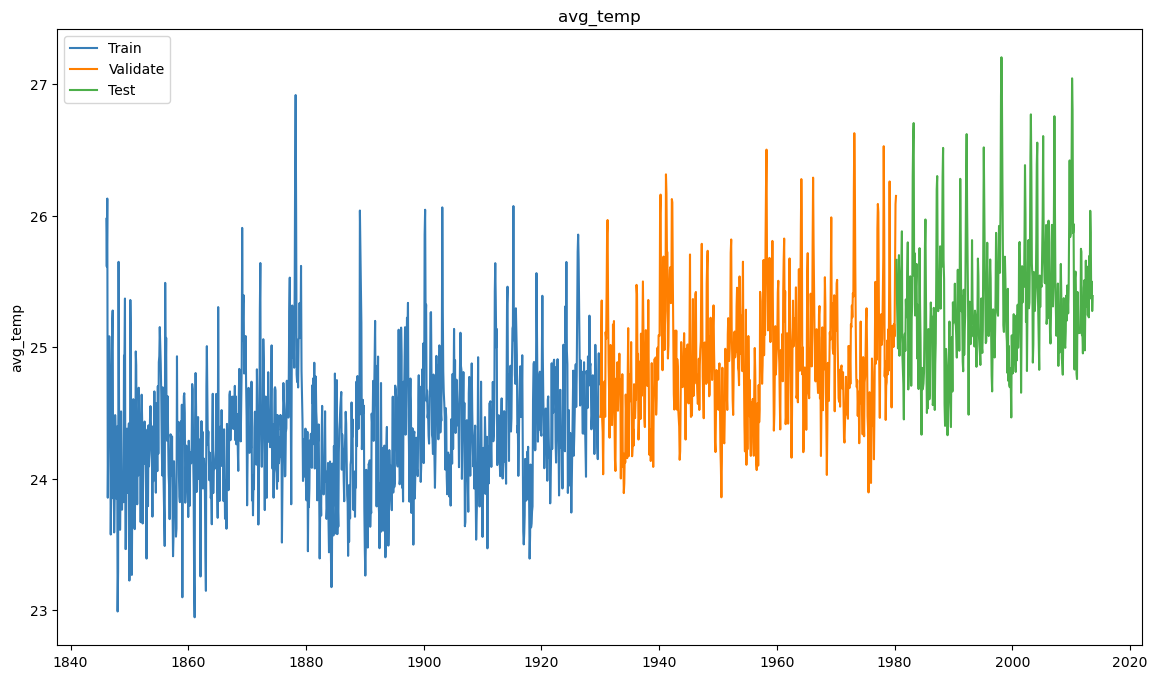

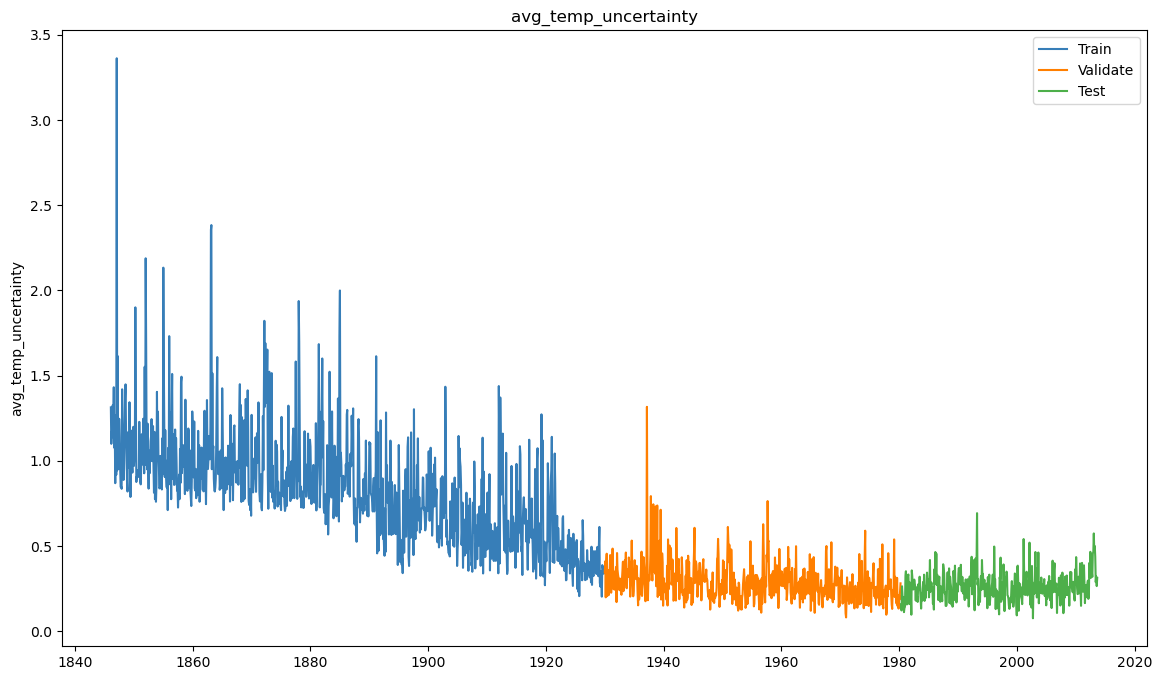

In [32]:

for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col], color='#377eb8', label = 'Train')
    plt.plot(validate[col], color='#ff7f00', label = 'Validate')
    plt.plot(test[col], color='#4daf4a', label = 'Test')
    plt.legend()
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [33]:
train['month'] = train.index.month_name()
train

avg_temp  avg_temp_uncertainty      month
date                                                 
1846-01-31    25.977                 1.314    January
1846-02-28    25.614                 1.100   February
1846-03-31    26.131                 1.174      March
1846-04-30    23.857                 1.139      April
1846-05-31    24.321                 1.328        May
1846-06-30    24.749                 1.218       June
1846-07-31    25.084                 1.432       July
1846-08-31    24.838                 1.077     August
1846-09-30    24.309                 1.188  September
1846-10-31    23.577                 0.869    October
1846-11-30    23.932                 1.269   November
1846-12-31    24.817                 0.918   December
1847-01-31    25.184                 3.363    January
1847-02-28    25.280                 0.944   February
1847-03-31    23.852                 1.615      March
1847-04-30    24.139                 0.990      April
1847-05-31    23.593                 0.952        May
1847-06-30    23.832                 1.247       June
1847-07-31    24.485                 1.136       July
1847-08-31    24.336                 0.964     August
1847-09-30    24.232                 0.847  September
1847-10-31    23.848                 0.850    October
1847-11-30    24.398                 0.836   November
1847-12-31    22.992                 1.420   December
1848-01-31    23.299                 1.212    January
1848-02-29    25.650                 1.039   February
1848-03-31    24.474                 0.888      March
1848-04-30    24.281                 0.954      April
1848-05-31    23.613                 1.130        May
1848-06-30    23.888                 1.367       June
1848-07-31    24.513                 1.449       July
1848-08-31    24.045                 1.163     August
1848-09-30    23.766                 1.071  September
1848-10-31    24.011                 0.879    October
1848-11-30    23.882                 0.820   November
1848-12-31    23.823                 1.168   December
1849-01-31    24.937                 0.962    January
1849-02-28    24.923                 1.021   February
1849-03-31    25.371                 1.344      March
1849-04-30    23.467                 1.161      April
1849-05-31    23.467                 0.788        May
1849-06-30    23.934                 1.178       June
1849-07-31    24.382                 0.982       July
1849-08-31    24.350                 0.983     August
1849-09-30    23.894                 0.931  September
1849-10-31    24.325                 1.081    October
1849-11-30    24.422                 1.200   November
1849-12-31    23.227                 0.970   December
1850-01-31    23.614                 1.032    January
1850-02-28    25.360                 1.051   February
1850-03-31    25.053                 1.901      March
1850-04-30    23.895                 1.410      April
1850-05-31    23.270                 0.876        May
1850-06-30    23.902                 0.909       June
1850-07-31    24.461                 0.904       July
1850-08-31    24.606                 0.946     August
1850-09-30    24.324                 0.907  September
1850-10-31    23.631                 0.926    October
1850-11-30    23.618                 1.229   November
1850-12-31    23.952                 1.073   December
1851-01-31    24.969                 0.875    January
1851-02-28    24.864                 0.862   February
1851-03-31    24.162                 0.972      March
1851-04-30    23.807                 1.156      April
1851-05-31    24.242                 0.978        May
1851-06-30    24.026                 1.045       June
1851-07-31    24.693                 1.247       July
1851-08-31    24.504                 1.150     August
1851-09-30    24.385                 0.927  September
1851-10-31    24.326                 1.552    October
1851-11-30    23.671                 0.976   November
1851-12-31    24.405                 2.189   December
1852-01-31    24

<AxesSubplot:xlabel='month'>

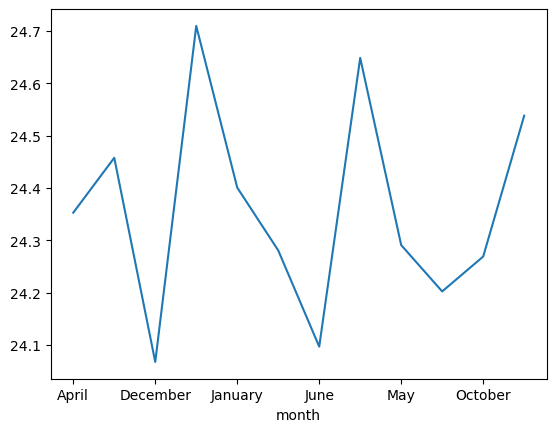

In [34]:
train.groupby('month')['avg_temp'].mean().plot()


<AxesSubplot:xlabel='date'>

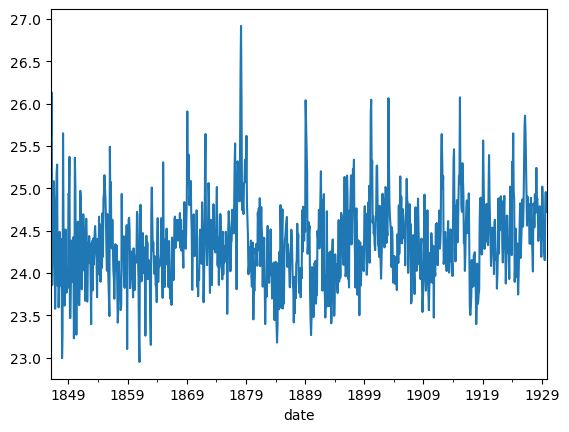

In [35]:
train['avg_temp'].resample('M').mean().plot()

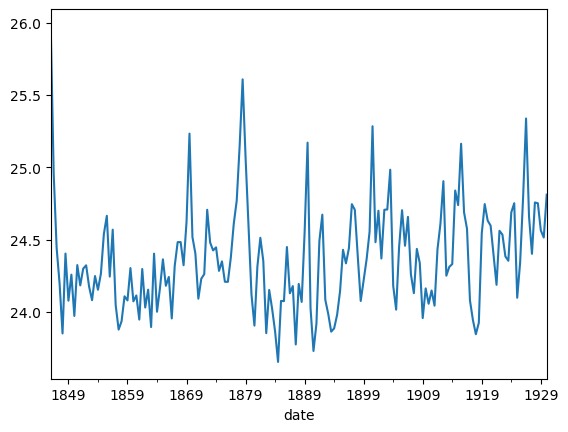

In [36]:
train['avg_temp'].resample('6M').mean().plot()

plt.show()

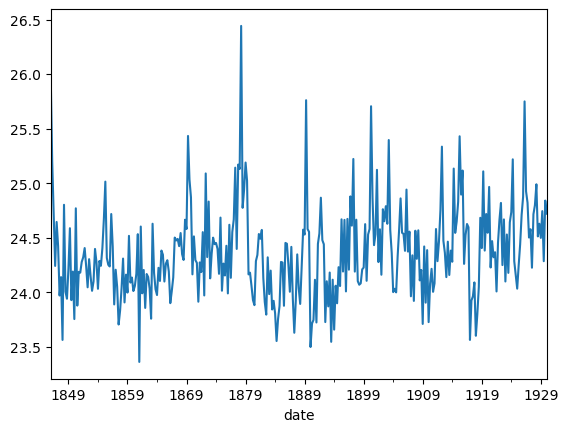

In [37]:
train['avg_temp'].resample('3M').mean().plot()
plt.show()

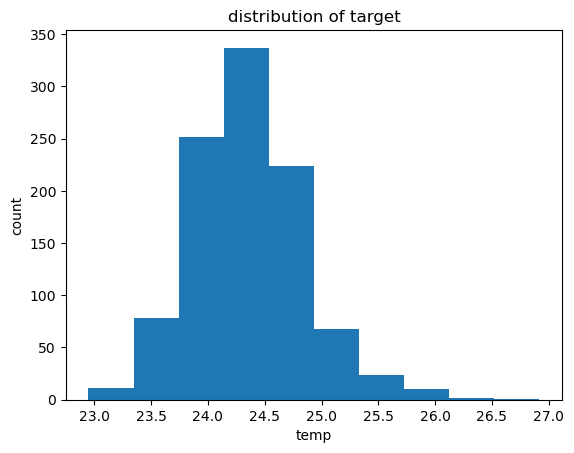

In [38]:
plt.hist(train['avg_temp'])
plt.xlabel('temp')
plt.ylabel('count')
plt.title('distribution of target')
plt.show()

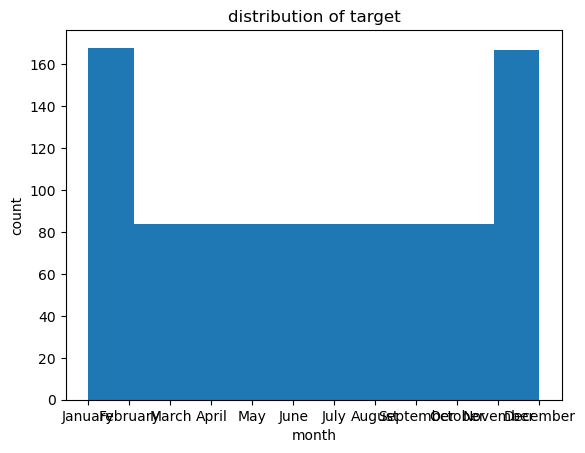

In [39]:
plt.hist(train['month'])
plt.xlabel('month')
plt.ylabel('count')
plt.title('distribution of target')
plt.show()

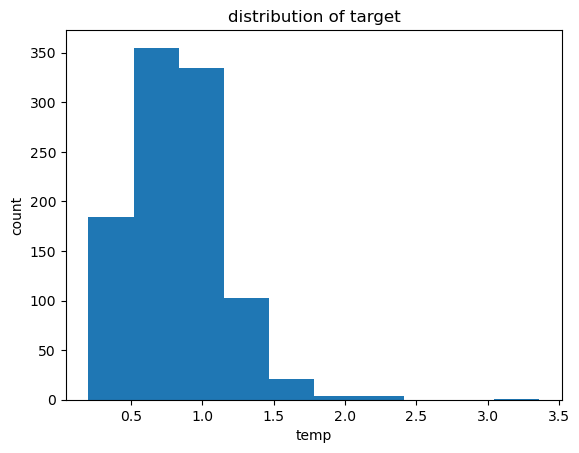

In [40]:
plt.hist(train['avg_temp_uncertainty'])
plt.xlabel('temp')
plt.ylabel('count')
plt.title('distribution of target')
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

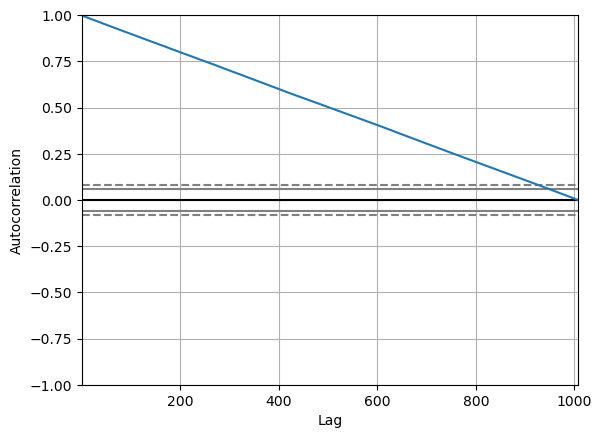

In [41]:
pd.plotting.autocorrelation_plot(train.resample('M').mean())

In [42]:
month_mean = train['avg_temp'].resample('M').mean()
month_mean = pd.DataFrame(month_mean)

In [43]:
month_mean['shifted'] = month_mean['avg_temp'].shift(-1)
month_mean

avg_temp  shifted
date                         
1846-01-31    25.977   25.614
1846-02-28    25.614   26.131
1846-03-31    26.131   23.857
1846-04-30    23.857   24.321
1846-05-31    24.321   24.749
1846-06-30    24.749   25.084
1846-07-31    25.084   24.838
1846-08-31    24.838   24.309
1846-09-30    24.309   23.577
1846-10-31    23.577   23.932
1846-11-30    23.932   24.817
1846-12-31    24.817   25.184
1847-01-31    25.184   25.280
1847-02-28    25.280   23.852
1847-03-31    23.852   24.139
1847-04-30    24.139   23.593
1847-05-31    23.593   23.832
1847-06-30    23.832   24.485
1847-07-31    24.485   24.336
1847-08-31    24.336   24.232
1847-09-30    24.232   23.848
1847-10-31    23.848   24.398
1847-11-30    24.398   22.992
1847-12-31    22.992   23.299
1848-01-31    23.299   25.650
1848-02-29    25.650   24.474
1848-03-31    24.474   24.281
1848-04-30    24.281   23.613
1848-05-31    23.613   23.888
1848-06-30    23.888   24.513
1848-07-31    24.513   24.045
1848-08-31    24.045   23.766
1848-09-30    23.766   24.011
1848-10-31    24.011   23.882
1848-11-30    23.882   23.823
1848-12-31    23.823   24.937
1849-01-31    24.937   24.923
1849-02-28    24.923   25.371
1849-03-31    25.371   23.467
1849-04-30    23.467   23.467
1849-05-31    23.467   23.934
1849-06-30    23.934   24.382
1849-07-31    24.382   24.350
1849-08-31    24.350   23.894
1849-09-30    23.894   24.325
1849-10-31    24.325   24.422
1849-11-30    24.422   23.227
1849-12-31    23.227   23.614
1850-01-31    23.614   25.360
1850-02-28    25.360   25.053
1850-03-31    25.053   23.895
1850-04-30    23.895   23.270
1850-05-31    23.270   23.902
1850-06-30    23.902   24.461
1850-07-31    24.461   24.606
1850-08-31    24.606   24.324
1850-09-30    24.324   23.631
1850-10-31    23.631   23.618
1850-11-30    23.618   23.952
1850-12-31    23.952   24.969
1851-01-31    24.969   24.864
1851-02-28    24.864   24.162
1851-03-31    24.162   23.807
1851-04-30    23.807   24.242
1851-05-31    24.242   24.026
1851-06-30    24.026   24.693
1851-07-31    24.693   24.504
1851-08-31    24.504   24.385
1851-09-30    24.385   24.326
1851-10-31    24.326   23.671
1851-11-30    23.671   24.405
1851-12-31    24.405   24.640
1852-01-31    24.640   24.456
1852-02-29    24.456   23.661
1852-03-31    23.661   24.019
1852-04-30    24.019   24.358
1852-05-31    24.358   24.116
1852-06-30    24.116   24.436
1852-07-31    24.436   24.236
1852-08-31    24.236   24.344
1852-09-30    24.344   23.866
1852-10-31    23.866   23.394
1852-11-30    23.394   24.269
1852-12-31    24.269   24.377
1853-01-31    24.377   23.793
1853-02-28    23.793   24.407
1853-03-31    24.407   24.095
1853-04-30    24.095   24.191
1853-05-31    24.191   24.447
1853-06-30    24.447   24.553
1853-07-31    24.553   24.418
1853-08-31    24.418   24.256
1853-09-30    24.256   24.148
1853-10-31    24.148   23.713
1853-11-30    23.713   24.399
1853-12-31    24.399   23.983
1854-01-31    23.983   24.075
1854-02-28    24.075   24.665
1854-03-31    24.665   24.121
1854-04-30    24.121   24.258
1854-05-31    24.258   23.895
1854-06-30    23.895   24.574
1854-07-31    24.574   24.453
1854-08-31    24.453   24.059
1854-09-30    24.059   24.705
1854-10-31    24.705   24.191
1854-11-30    24.191   24.887
1854-12-31    24.887   24.934
1855-01-31    24.934   25.154
1855-02-28    25.154   25.013
1855-03-31    25.013   24.875
1855-04-30    24.875   24.647
1855-05-31    24.647   24.270
1855-06-30    24.270   24.026
1855-07-31    24.026   24.696
1855-08-31    24.696   24.141
1855-09-30    24.141   23.917
1855-10-31    23.917   23.729
1855-11-30    23.729   23.490
1855-12-31    23.490   25.490
1856-01-31    25.490   24.753
1856-02-29    24.753   25.072
1856-03-31    25.072   24.326
1856-04-30    24.326   24.289
1856-05-31    24.289   24.628
1856-06-30    24.628   24.342
1856-07-31    24.342   24.031
1856-08-31    24.031   23.940
1856-09-30    23.940   23.694
1856-10-31    23.694   23.980
1856-11-30    23.980   24.339
1856-12-31    24.339  

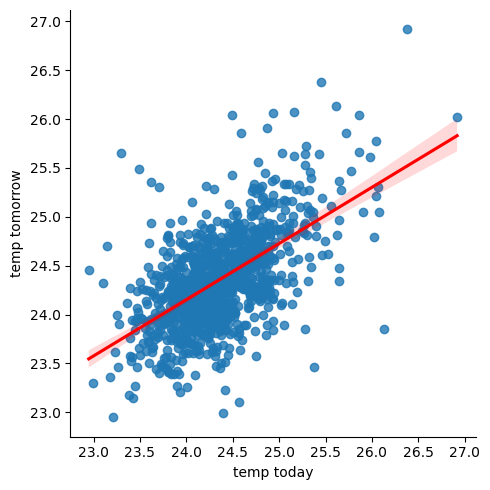

In [44]:
sns.lmplot(data = month_mean, x = 'avg_temp', y = 'shifted', line_kws= {'color': 'red'})
plt.xlabel('temp today')
plt.ylabel('temp tomorrow')
plt.show()

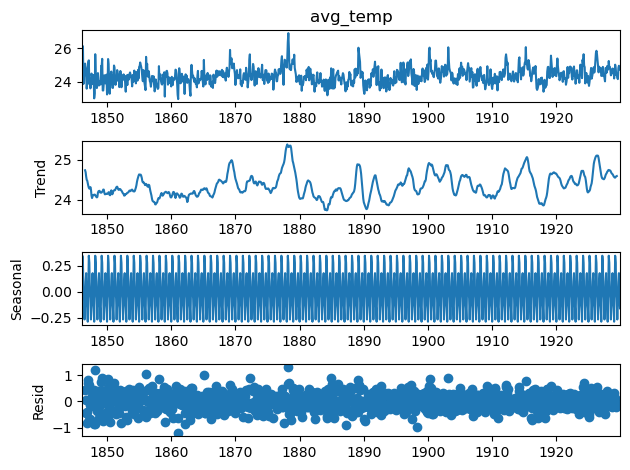

In [45]:
result = sm.tsa.seasonal_decompose(train['avg_temp'].resample('M').mean())

result.plot()
plt.show()

## Modeling

In [46]:
def evaluate(target_var):
    '''
    This function will take the actual values of the target_var from validate, 
    and the predicted values stored in yhat_df, 
    and compute the rmse, rounding to 0 decimal places. 
    it will return the rmse. 
    '''
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 7)
    return rmse

In [47]:
def plot_and_eval(target_var):
    '''
    This function takes in the target var name (string), and returns a plot
    of the values of train for that variable, validate, and the predicted values from yhat_df. 
    it will als lable the rmse. 
    '''
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label='Train', linewidth=1, color='#377eb8')
    plt.plot(validate[target_var], label='Validate', linewidth=1, color='#ff7f00')
    plt.plot(yhat_df[target_var], label='yhat', linewidth=2, color='#a65628')
    plt.legend()
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [48]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df

Empty DataFrame
Columns: [model_type, target_var, rmse]
Index: []

In [49]:
def append_eval_df(model_type, target_var):
    '''
    this function takes in as arguments the type of model run, and the name of the target variable. 
    It returns the eval_df with the rmse appended to it for that model and target_var. 
    '''
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var],
        'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [50]:
train = train.iloc[:,0]
train = pd.DataFrame(train)

In [51]:
last_temp = train['avg_temp'][-1:][0]
last_temp

24.72

In [52]:
yhat_df = pd.DataFrame(
    {'avg_temp': last_temp},
    index=validate.index)

yhat_df.head()

avg_temp
date                
1929-12-31     24.72
1930-01-31     24.72
1930-02-28     24.72
1930-03-31     24.72
1930-04-30     24.72

avg_temp -- RMSE: 1


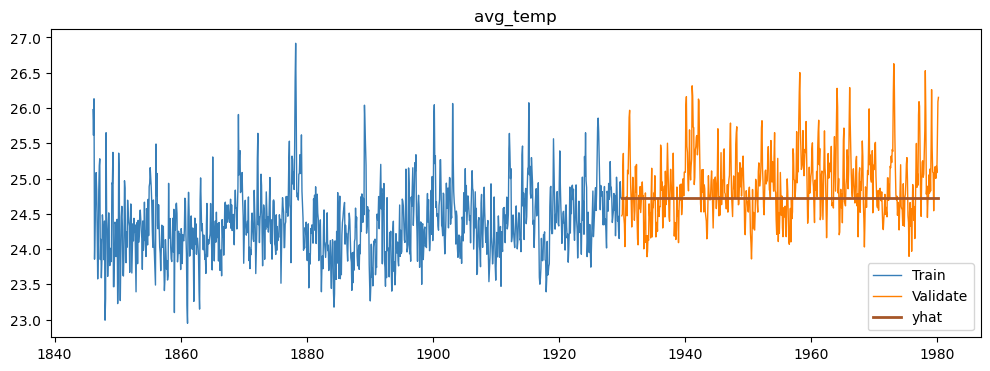

In [53]:
for col in train.columns:
    plot_and_eval(col)

In [54]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)

eval_df

model_type target_var      rmse
0  last_observed_value   avg_temp  0.509697

In [55]:
avg_temp = round(train.mean(), 2)[0]
avg_temp

24.36

In [56]:
def make_baseline_predictions(temp_predictions=None):
    yhat_df = pd.DataFrame({'avg_temp': temp_predictions},
                          index=validate.index)
    return yhat_df

In [57]:
yhat_df = make_baseline_predictions(avg_temp)

avg_temp -- RMSE: 1


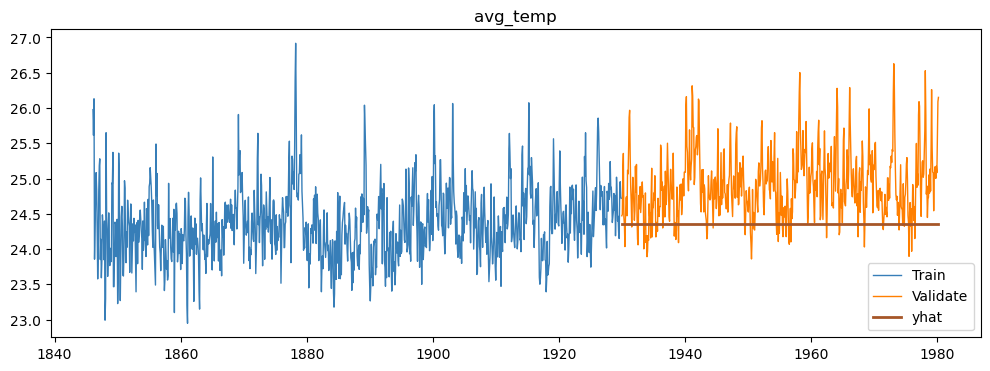

In [58]:
for col in train.columns:
    plot_and_eval(col)

In [59]:
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                            target_var = col)
eval_df

model_type target_var      rmse
0  last_observed_value   avg_temp  0.509697
1       simple_average   avg_temp  0.724143

In [60]:
period=3
train['avg_temp'].rolling(period).mean()

date
1846-01-31          NaN
1846-02-28          NaN
1846-03-31    25.907333
1846-04-30    25.200667
1846-05-31    24.769667
1846-06-30    24.309000
1846-07-31    24.718000
1846-08-31    24.890333
1846-09-30    24.743667
1846-10-31    24.241333
1846-11-30    23.939333
1846-12-31    24.108667
1847-01-31    24.644333
1847-02-28    25.093667
1847-03-31    24.772000
1847-04-30    24.423667
1847-05-31    23.861333
1847-06-30    23.854667
1847-07-31    23.970000
1847-08-31    24.217667
1847-09-30    24.351000
1847-10-31    24.138667
1847-11-30    24.159333
1847-12-31    23.746000
1848-01-31    23.563000
1848-02-29    23.980333
1848-03-31    24.474333
1848-04-30    24.801667
1848-05-31    24.122667
1848-06-30    23.927333
1848-07-31    24.004667
1848-08-31    24.148667
1848-09-30    24.108000
1848-10-31    23.940667
1848-11-30    23.886333
1848-12-31    23.905333
1849-01-31    24.214000
1849-02-28    24.561000
1849-03-31    25.077000
1849-04-30    24.587000
1849-05-31    24.101667
1849-06-30 

In [61]:
train['avg_temp'].rolling(period).mean()[-1]

24.80666666666667

In [62]:
rolling_amount = round(train['avg_temp'].rolling(period).mean()[-1], 2)

print(rolling_amount)

24.81


In [63]:
yhat_df = make_baseline_predictions(rolling_amount)
yhat_df.head()

avg_temp
date                
1929-12-31     24.81
1930-01-31     24.81
1930-02-28     24.81
1930-03-31     24.81
1930-04-30     24.81

avg_temp -- RMSE: 0


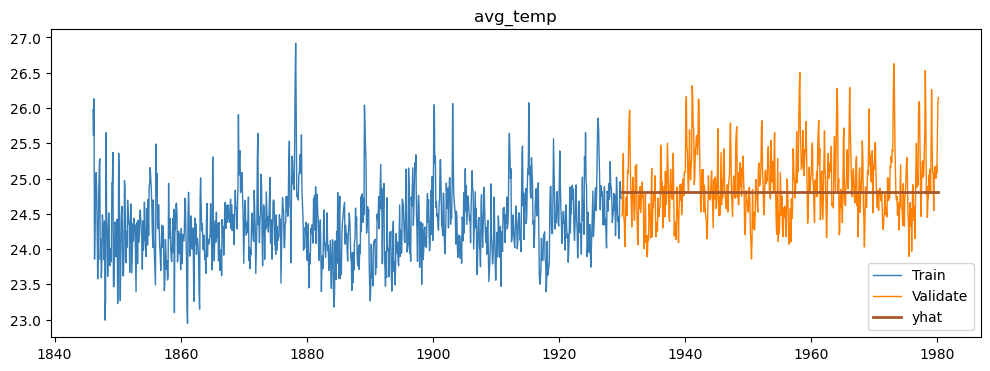

In [64]:
for col in train.columns:
    plot_and_eval(col)

In [65]:
for col in train.columns:
    eval_df = append_eval_df(model_type = '1Q_moving_avg', 
                            target_var = col)

eval_df

model_type target_var      rmse
0  last_observed_value   avg_temp  0.509697
1       simple_average   avg_temp  0.724143
2        1Q_moving_avg   avg_temp  0.483884

In [66]:
periods = [1, 2, 6, 9, 12]

for p in periods: 
    rolling_amount = round(train['avg_temp'].rolling(p).mean()[-1], 2)
    
    yhat_df = make_baseline_predictions(rolling_amount)
    model_type = str(p) + '_month_moving_avg'
    for col in train.columns:
        eval_df = append_eval_df(model_type = model_type,
                                target_var = col)

In [67]:
eval_df

model_type target_var      rmse
0  last_observed_value   avg_temp  0.509697
1       simple_average   avg_temp  0.724143
2        1Q_moving_avg   avg_temp  0.483884
3   1_month_moving_avg   avg_temp  0.509697
4   2_month_moving_avg   avg_temp  0.506104
5   6_month_moving_avg   avg_temp  0.564968
6   9_month_moving_avg   avg_temp  0.570472
7  12_month_moving_avg   avg_temp  0.570472

In [68]:
best_amount_rmse = eval_df[eval_df.target_var == 'avg_temp']['rmse'].min()
best_amount_rmse

0.4838838

In [69]:
eval_df[eval_df.rmse == best_amount_rmse]

model_type target_var      rmse
2  1Q_moving_avg   avg_temp  0.483884

## Holts Linear

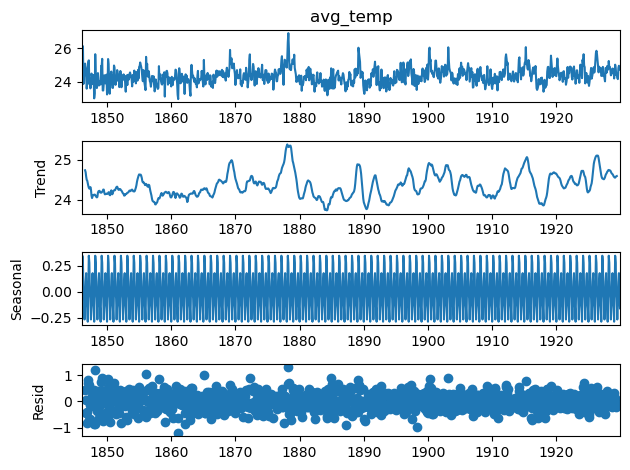

In [70]:
for col in train.columns:
    sm.tsa.seasonal_decompose(train[col].resample('M').mean()).plot()
    plt.show()

In [71]:
model = Holt(train['avg_temp'], exponential=False, damped=True)
model = model.fit(optimized=True)

In [72]:
yhat_amount = model.predict(start = validate.index[0],
                              end = validate.index[-1])

In [73]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_optimized', 
                            target_var = col)

In [74]:
eval_df

model_type target_var      rmse
0  last_observed_value   avg_temp  0.509697
1       simple_average   avg_temp  0.724143
2        1Q_moving_avg   avg_temp  0.483884
3   1_month_moving_avg   avg_temp  0.509697
4   2_month_moving_avg   avg_temp  0.506104
5   6_month_moving_avg   avg_temp  0.564968
6   9_month_moving_avg   avg_temp  0.570472
7  12_month_moving_avg   avg_temp  0.570472
8      holts_optimized   avg_temp  0.570472

In [75]:
hst_temp_fit1 = ExponentialSmoothing(train.avg_temp, seasonal_periods=12, trend='add', seasonal='add').fit()
hst_temp_fit2 = ExponentialSmoothing(train.avg_temp, seasonal_periods=12, trend='add', seasonal='mul').fit()
hst_temp_fit3 = ExponentialSmoothing(train.avg_temp, seasonal_periods=12, trend='add', seasonal='add', damped=True).fit()
hst_temp_fit4 = ExponentialSmoothing(train.avg_temp, seasonal_periods=12, trend='add', seasonal='mul', damped=True).fit()


In [76]:
results_amount=pd.DataFrame({'model':['hst_temp_fit1', 'hst_temp_fit2', 'hst_temp_fit3', 'hst_temp_fit4'],
                              'SSE':[hst_temp_fit1.sse, hst_temp_fit2.sse, hst_temp_fit3.sse, hst_temp_fit4.sse]})
results_amount

model         SSE
0  hst_temp_fit1  141.003993
1  hst_temp_fit2  140.628866
2  hst_temp_fit3  139.918537
3  hst_temp_fit4  139.573496

In [77]:
results_amount.sort_values(by='SSE')

model         SSE
3  hst_temp_fit4  139.573496
2  hst_temp_fit3  139.918537
1  hst_temp_fit2  140.628866
0  hst_temp_fit1  141.003993

In [85]:
yhat_df = pd.DataFrame({'avg_temp': hst_temp_fit4.forecast(validate.shape[0])},
                          index=validate.index)
yhat_df

avg_temp
date                 
1929-12-31  24.463287
1930-01-31  24.762890
1930-02-28  25.115610
1930-03-31  25.086304
1930-04-30  24.807098
1930-05-31  24.712548
1930-06-30  24.448022
1930-07-31  24.598412
1930-08-31  24.897547
1930-09-30  25.019774
1930-10-31  24.685900
1930-11-30  24.644352
1930-12-31  24.463287
1931-01-31  24.762890
1931-02-28  25.115610
1931-03-31  25.086304
1931-04-30  24.807098
1931-05-31  24.712548
1931-06-30  24.448022
1931-07-31  24.598412
1931-08-31  24.897547
1931-09-30  25.019774
1931-10-31  24.685900
1931-11-30  24.644352
1931-12-31  24.463287
1932-01-31  24.762890
1932-02-29  25.115610
1932-03-31  25.086304
1932-04-30  24.807098
1932-05-31  24.712548
1932-06-30  24.448022
1932-07-31  24.598412
1932-08-31  24.897547
1932-09-30  25.019774
1932-10-31  24.685900
1932-11-30  24.644352
1932-12-31  24.463287
1933-01-31  24.762890
1933-02-28  25.115610
1933-03-31  25.086304
1933-04-30  24.807098
1933-05-31  24.712548
1933-06-30  24.448022
1933-07-31  24.598412
1933-08-31  24.897547
1933-09-30  25.019774
1933-10-31  24.685900
1933-11-30  24.644352
1933-12-31  24.463287
1934-01-31  24.762890
1934-02-28  25.115610
1934-03-31  25.086304
1934-04-30  24.807098
1934-05-31  24.712548
1934-06-30  24.448022
1934-07-31  24.598412
1934-08-31  24.897547
1934-09-30  25.019774
1934-10-31  24.685900
1934-11-30  24.644352
1934-12-31  24.463287
1935-01-31  24.762890
1935-02-28  25.115610
1935-03-31  25.086304
1935-04-30  24.807098
1935-05-31  24.712548
1935-06-30  24.448022
1935-07-31  24.598412
1935-08-31  24.897547
1935-09-30  25.019774
1935-10-31  24.685900
1935-11-30  24.644352
1935-12-31  24.463287
1936-01-31  24.762890
1936-02-29  25.115610
1936-03-31  25.086304
1936-04-30  24.807098
1936-05-31  24.712548
1936-06-30  24.448022
1936-07-31  24.598412
1936-08-31  24.897547
1936-09-30  25.019774
1936-10-31  24.685900
1936-11-30  24.644352
1936-12-31  24.463287
1937-01-31  24.762890
1937-02-28  25.115610
1937-03-31  25.086304
1937-04-30  24.807098
1937-05-31  24.712548
1937-06-30  24.448022
1937-07-31  24.598412
1937-08-31  24.897547
1937-09-30  25.019774
1937-10-31  24.685900
1937-11-30  24.644352
1937-12-31  24.463287
1938-01-31  24.762890
1938-02-28  25.115610
1938-03-31  25.086304
1938-04-30  24.807098
1938-05-31  24.712548
1938-06-30  24.448022
1938-07-31  24.598412
1938-08-31  24.897547
1938-09-30  25.019774
1938-10-31  24.685900
1938-11-30  24.644352
1938-12-31  24.463287
1939-01-31  24.762890
1939-02-28  25.115610
1939-03-31  25.086304
1939-04-30  24.807098
1939-05-31  24.712548
1939-06-30  24.448022
1939-07-31  24.598412
1939-08-31  24.897547
1939-09-30  25.019774
1939-10-31  24.685900
1939-11-30  24.644352
1939-12-31  24.463287
1940-01-31  24.762890
1940-02-29  25.115610
1940-03-31  25.086304
1940-04-30  24.807098
1940-05-31  24.712548
1940-06-30  24.448022
1940-07-31  24.598412
1940-08-31  24.897547
1940-09-30  25.019774
1940-10-31  24.685900
1940-11-30  24.644352
1940-12-31  24.463287
1941-01-31  24.762890
1941-02-28  25.115610
1941-03-31  25.086304
1941-04-30  24.807098
1941-05-31  24.712548
1941-06-30  24.448022
1941-07-31  24.598412
1941-08-31  24.897547
1941-09-30  25.019774
1941-10-31  24.685900
1941-11-30  24.644352
1941-12-31  24.463287
1942-01-31  24.762890
1942-02-28  25.115610
1942-03-31  25.086304
1942-04-30  24.807098
1942-05-31  24.712548
1942-06-30  24.448022
1942-07-31  24.598412
1942-08-31  24.897547
1942-09-30  25.019774
1942-10-31  24.685900
1942-11-30  24.644352
1942-12-31  24.463287
1943-01-31  24.762890
1943-02-28  25.115610
1943-03-31  25.086304
1943-04-30  24.807098
1943-05-31  24.712548
1943-06-30  24.448022
1943-07-31  24.598412
1943-08-31  24.897547
1943-09-30  25.019774
1943-10-31  24.685900
1943-11-30  24.644352
1943-12-31  24.463287
1944-01-31  24.762890
1944-02-29  25.115610
1944-03-31  25.086304
1944-04-30  24.807098
1944-05-31  24.712548
1944-06-30  24.448022
1944-07-31  24.598412
1944-08-31  24.897547
1944-09-30  25.019774
1944-10-31  24.685900
1944-11-30  24.644352
1944-12-3

In [87]:
train = train.iloc[:,0]
train = pd.DataFrame(train)

avg_temp -- RMSE: 0


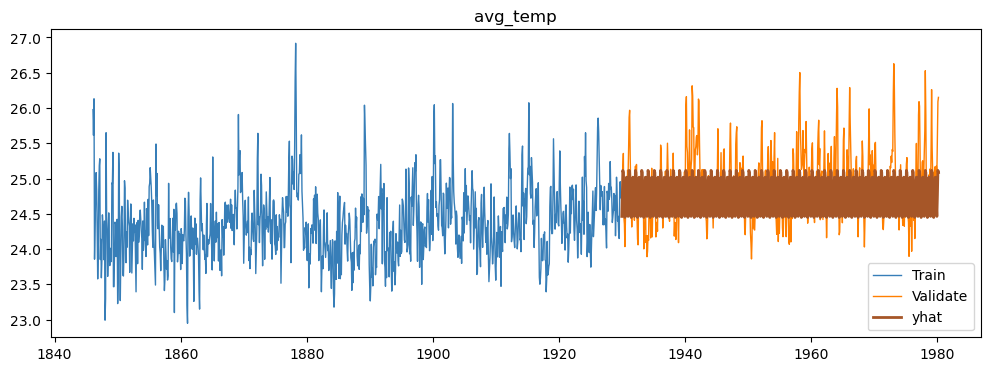

In [88]:
for col in train.columns:
    plot_and_eval(col)

In [89]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'holts_seasonal_add_add', 
                            target_var = col)

In [90]:
eval_df.sort_values('rmse')

model_type target_var      rmse
10  holts_seasonal_add_add   avg_temp  0.425382
9   holts_seasonal_add_add   avg_temp  0.425662
2            1Q_moving_avg   avg_temp  0.483884
4       2_month_moving_avg   avg_temp  0.506104
0      last_observed_value   avg_temp  0.509697
3       1_month_moving_avg   avg_temp  0.509697
5       6_month_moving_avg   avg_temp  0.564968
6       9_month_moving_avg   avg_temp  0.570472
7      12_month_moving_avg   avg_temp  0.570472
8          holts_optimized   avg_temp  0.570472
1           simple_average   avg_temp  0.724143

In [91]:
train = colombia_resampled[:train_size]
validate = colombia_resampled[train_size:validate_end_index]
test = colombia_resampled[validate_end_index:]

In [83]:
train.shape, validate.shape, test.shape

((1007, 2), (604, 2), (401, 2))

In [92]:
yhat_df = pd.DataFrame({'avg_temp': hst_temp_fit4.forecast(validate.shape[0] + test.shape[0])})
yhat_df

avg_temp
1929-12-31  24.463287
1930-01-31  24.762890
1930-02-28  25.115610
1930-03-31  25.086304
1930-04-30  24.807098
1930-05-31  24.712548
1930-06-30  24.448022
1930-07-31  24.598412
1930-08-31  24.897547
1930-09-30  25.019774
1930-10-31  24.685900
1930-11-30  24.644352
1930-12-31  24.463287
1931-01-31  24.762890
1931-02-28  25.115610
1931-03-31  25.086304
1931-04-30  24.807098
1931-05-31  24.712548
1931-06-30  24.448022
1931-07-31  24.598412
1931-08-31  24.897547
1931-09-30  25.019774
1931-10-31  24.685900
1931-11-30  24.644352
1931-12-31  24.463287
1932-01-31  24.762890
1932-02-29  25.115610
1932-03-31  25.086304
1932-04-30  24.807098
1932-05-31  24.712548
1932-06-30  24.448022
1932-07-31  24.598412
1932-08-31  24.897547
1932-09-30  25.019774
1932-10-31  24.685900
1932-11-30  24.644352
1932-12-31  24.463287
1933-01-31  24.762890
1933-02-28  25.115610
1933-03-31  25.086304
1933-04-30  24.807098
1933-05-31  24.712548
1933-06-30  24.448022
1933-07-31  24.598412
1933-08-31  24.897547
1933-09-30  25.019774
1933-10-31  24.685900
1933-11-30  24.644352
1933-12-31  24.463287
1934-01-31  24.762890
1934-02-28  25.115610
1934-03-31  25.086304
1934-04-30  24.807098
1934-05-31  24.712548
1934-06-30  24.448022
1934-07-31  24.598412
1934-08-31  24.897547
1934-09-30  25.019774
1934-10-31  24.685900
1934-11-30  24.644352
1934-12-31  24.463287
1935-01-31  24.762890
1935-02-28  25.115610
1935-03-31  25.086304
1935-04-30  24.807098
1935-05-31  24.712548
1935-06-30  24.448022
1935-07-31  24.598412
1935-08-31  24.897547
1935-09-30  25.019774
1935-10-31  24.685900
1935-11-30  24.644352
1935-12-31  24.463287
1936-01-31  24.762890
1936-02-29  25.115610
1936-03-31  25.086304
1936-04-30  24.807098
1936-05-31  24.712548
1936-06-30  24.448022
1936-07-31  24.598412
1936-08-31  24.897547
1936-09-30  25.019774
1936-10-31  24.685900
1936-11-30  24.644352
1936-12-31  24.463287
1937-01-31  24.762890
1937-02-28  25.115610
1937-03-31  25.086304
1937-04-30  24.807098
1937-05-31  24.712548
1937-06-30  24.448022
1937-07-31  24.598412
1937-08-31  24.897547
1937-09-30  25.019774
1937-10-31  24.685900
1937-11-30  24.644352
1937-12-31  24.463287
1938-01-31  24.762890
1938-02-28  25.115610
1938-03-31  25.086304
1938-04-30  24.807098
1938-05-31  24.712548
1938-06-30  24.448022
1938-07-31  24.598412
1938-08-31  24.897547
1938-09-30  25.019774
1938-10-31  24.685900
1938-11-30  24.644352
1938-12-31  24.463287
1939-01-31  24.762890
1939-02-28  25.115610
1939-03-31  25.086304
1939-04-30  24.807098
1939-05-31  24.712548
1939-06-30  24.448022
1939-07-31  24.598412
1939-08-31  24.897547
1939-09-30  25.019774
1939-10-31  24.685900
1939-11-30  24.644352
1939-12-31  24.463287
1940-01-31  24.762890
1940-02-29  25.115610
1940-03-31  25.086304
1940-04-30  24.807098
1940-05-31  24.712548
1940-06-30  24.448022
1940-07-31  24.598412
1940-08-31  24.897547
1940-09-30  25.019774
1940-10-31  24.685900
1940-11-30  24.644352
1940-12-31  24.463287
1941-01-31  24.762890
1941-02-28  25.115610
1941-03-31  25.086304
1941-04-30  24.807098
1941-05-31  24.712548
1941-06-30  24.448022
1941-07-31  24.598412
1941-08-31  24.897547
1941-09-30  25.019774
1941-10-31  24.685900
1941-11-30  24.644352
1941-12-31  24.463287
1942-01-31  24.762890
1942-02-28  25.115610
1942-03-31  25.086304
1942-04-30  24.807098
1942-05-31  24.712548
1942-06-30  24.448022
1942-07-31  24.598412
1942-08-31  24.897547
1942-09-30  25.019774
1942-10-31  24.685900
1942-11-30  24.644352
1942-12-31  24.463287
1943-01-31  24.762890
1943-02-28  25.115610
1943-03-31  25.086304
1943-04-30  24.807098
1943-05-31  24.712548
1943-06-30  24.448022
1943-07-31  24.598412
1943-08-31  24.897547
1943-09-30  25.019774
1943-10-31  24.685900
1943-11-30  24.644352
1943-12-31  24.463287
1944-01-31  24.762890
1944-02-29  25.115610
1944-03-31  25.086304
1944-04-30  24.807098
1944-05-31  24.712548
1944-06-30  24.448022
1944-07-31  24.598412
1944-08-31  24.897547
1944-09-30  25.019774
1944-10-31  24.685900
1944-11-30  24.644352
1944-12-31  24.463287
1945-01-3

In [93]:
validate.head(1)

avg_temp  avg_temp_uncertainty
date                                      
1929-12-31    24.472                 0.346

In [94]:
test.head(1)

avg_temp  avg_temp_uncertainty
date                                      
1980-04-30    25.665                 0.157

In [95]:
yhat_df = yhat_df['1980-04-30':]

In [96]:
yhat_df

avg_temp
1980-04-30  24.807098
1980-05-31  24.712548
1980-06-30  24.448022
1980-07-31  24.598412
1980-08-31  24.897547
1980-09-30  25.019774
1980-10-31  24.685900
1980-11-30  24.644352
1980-12-31  24.463287
1981-01-31  24.762890
1981-02-28  25.115610
1981-03-31  25.086304
1981-04-30  24.807098
1981-05-31  24.712548
1981-06-30  24.448022
1981-07-31  24.598412
1981-08-31  24.897547
1981-09-30  25.019774
1981-10-31  24.685900
1981-11-30  24.644352
1981-12-31  24.463287
1982-01-31  24.762890
1982-02-28  25.115610
1982-03-31  25.086304
1982-04-30  24.807098
1982-05-31  24.712548
1982-06-30  24.448022
1982-07-31  24.598412
1982-08-31  24.897547
1982-09-30  25.019774
1982-10-31  24.685900
1982-11-30  24.644352
1982-12-31  24.463287
1983-01-31  24.762890
1983-02-28  25.115610
1983-03-31  25.086304
1983-04-30  24.807098
1983-05-31  24.712548
1983-06-30  24.448022
1983-07-31  24.598412
1983-08-31  24.897547
1983-09-30  25.019774
1983-10-31  24.685900
1983-11-30  24.644352
1983-12-31  24.463287
1984-01-31  24.762890
1984-02-29  25.115610
1984-03-31  25.086304
1984-04-30  24.807098
1984-05-31  24.712548
1984-06-30  24.448022
1984-07-31  24.598412
1984-08-31  24.897547
1984-09-30  25.019774
1984-10-31  24.685900
1984-11-30  24.644352
1984-12-31  24.463287
1985-01-31  24.762890
1985-02-28  25.115610
1985-03-31  25.086304
1985-04-30  24.807098
1985-05-31  24.712548
1985-06-30  24.448022
1985-07-31  24.598412
1985-08-31  24.897547
1985-09-30  25.019774
1985-10-31  24.685900
1985-11-30  24.644352
1985-12-31  24.463287
1986-01-31  24.762890
1986-02-28  25.115610
1986-03-31  25.086304
1986-04-30  24.807098
1986-05-31  24.712548
1986-06-30  24.448022
1986-07-31  24.598412
1986-08-31  24.897547
1986-09-30  25.019774
1986-10-31  24.685900
1986-11-30  24.644352
1986-12-31  24.463287
1987-01-31  24.762890
1987-02-28  25.115610
1987-03-31  25.086304
1987-04-30  24.807098
1987-05-31  24.712548
1987-06-30  24.448022
1987-07-31  24.598412
1987-08-31  24.897547
1987-09-30  25.019774
1987-10-31  24.685900
1987-11-30  24.644352
1987-12-31  24.463287
1988-01-31  24.762890
1988-02-29  25.115610
1988-03-31  25.086304
1988-04-30  24.807098
1988-05-31  24.712548
1988-06-30  24.448022
1988-07-31  24.598412
1988-08-31  24.897547
1988-09-30  25.019774
1988-10-31  24.685900
1988-11-30  24.644352
1988-12-31  24.463287
1989-01-31  24.762890
1989-02-28  25.115610
1989-03-31  25.086304
1989-04-30  24.807098
1989-05-31  24.712548
1989-06-30  24.448022
1989-07-31  24.598412
1989-08-31  24.897547
1989-09-30  25.019774
1989-10-31  24.685900
1989-11-30  24.644352
1989-12-31  24.463287
1990-01-31  24.762890
1990-02-28  25.115610
1990-03-31  25.086304
1990-04-30  24.807098
1990-05-31  24.712548
1990-06-30  24.448022
1990-07-31  24.598412
1990-08-31  24.897547
1990-09-30  25.019774
1990-10-31  24.685900
1990-11-30  24.644352
1990-12-31  24.463287
1991-01-31  24.762890
1991-02-28  25.115610
1991-03-31  25.086304
1991-04-30  24.807098
1991-05-31  24.712548
1991-06-30  24.448022
1991-07-31  24.598412
1991-08-31  24.897547
1991-09-30  25.019774
1991-10-31  24.685900
1991-11-30  24.644352
1991-12-31  24.463287
1992-01-31  24.762890
1992-02-29  25.115610
1992-03-31  25.086304
1992-04-30  24.807098
1992-05-31  24.712548
1992-06-30  24.448022
1992-07-31  24.598412
1992-08-31  24.897547
1992-09-30  25.019774
1992-10-31  24.685900
1992-11-30  24.644352
1992-12-31  24.463287
1993-01-31  24.762890
1993-02-28  25.115610
1993-03-31  25.086304
1993-04-30  24.807098
1993-05-31  24.712548
1993-06-30  24.448022
1993-07-31  24.598412
1993-08-31  24.897547
1993-09-30  25.019774
1993-10-31  24.685900
1993-11-30  24.644352
1993-12-31  24.463287
1994-01-31  24.762890
1994-02-28  25.115610
1994-03-31  25.086304
1994-04-30  24.807098
1994-05-31  24.712548
1994-06-30  24.448022
1994-07-31  24.598412
1994-08-31  24.897547
1994-09-30  25.019774
1994-10-31  24.685900
1994-11-30  24.644352
1994-12-31  24.463287
1995-01-31  24.762890
1995-02-28  25.115610
1995-03-31  25.086304
1995-04-30  24.807098
1995-05-3

In [97]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], color='#377eb8', label='train')
    plt.plot(validate[target_var], color='#ff7f00', label='validate')
    plt.plot(test[target_var], color='#4daf4a',label='test')
    plt.plot(yhat_df[target_var], color='#a65628', label='yhat')
    plt.legend()
    plt.title(target_var)
    plt.show()

In [98]:
rmse_amount = sqrt(mean_squared_error(test['avg_temp'], 
                                       yhat_df['avg_temp']))

In [99]:
train = train.iloc[:,0]
train = pd.DataFrame(train)

In [100]:
test = test.iloc[:,0]
test = pd.DataFrame(test)

In [101]:
rmse_amount

0.7132732261213927

FINAL PERFORMANCE OF MODEL ON TEST DATA
rmse-amount:  0.7132732261213927


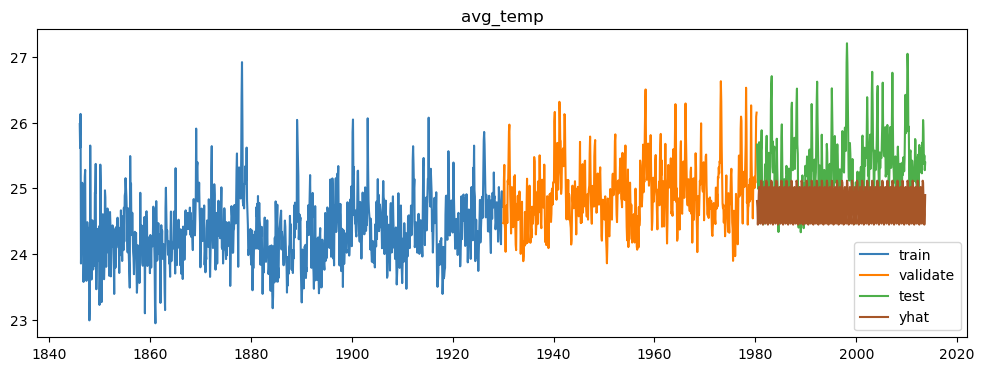

In [102]:
print('FINAL PERFORMANCE OF MODEL ON TEST DATA')
print('rmse-amount: ', rmse_amount)
for col in train.columns:
    final_plot(col)

In [103]:
eval_df

model_type target_var      rmse
0      last_observed_value   avg_temp  0.509697
1           simple_average   avg_temp  0.724143
2            1Q_moving_avg   avg_temp  0.483884
3       1_month_moving_avg   avg_temp  0.509697
4       2_month_moving_avg   avg_temp  0.506104
5       6_month_moving_avg   avg_temp  0.564968
6       9_month_moving_avg   avg_temp  0.570472
7      12_month_moving_avg   avg_temp  0.570472
8          holts_optimized   avg_temp  0.570472
9   holts_seasonal_add_add   avg_temp  0.425662
10  holts_seasonal_add_add   avg_temp  0.425382

In [107]:
forecast = pd.DataFrame({'avg_temp': hst_temp_fit4.forecast(validate.shape[0] + test.shape[0] + 48)})
forecast = forecast['2012':]
forecast

avg_temp
2012-01-31  24.762890
2012-02-29  25.115610
2012-03-31  25.086304
2012-04-30  24.807098
2012-05-31  24.712548
2012-06-30  24.448022
2012-07-31  24.598412
2012-08-31  24.897547
2012-09-30  25.019774
2012-10-31  24.685900
2012-11-30  24.644352
2012-12-31  24.463287
2013-01-31  24.762890
2013-02-28  25.115610
2013-03-31  25.086304
2013-04-30  24.807098
2013-05-31  24.712548
2013-06-30  24.448022
2013-07-31  24.598412
2013-08-31  24.897547
2013-09-30  25.019774
2013-10-31  24.685900
2013-11-30  24.644352
2013-12-31  24.463287
2014-01-31  24.762890
2014-02-28  25.115610
2014-03-31  25.086304
2014-04-30  24.807098
2014-05-31  24.712548
2014-06-30  24.448022
2014-07-31  24.598412
2014-08-31  24.897547
2014-09-30  25.019774
2014-10-31  24.685900
2014-11-30  24.644352
2014-12-31  24.463287
2015-01-31  24.762890
2015-02-28  25.115610
2015-03-31  25.086304
2015-04-30  24.807098
2015-05-31  24.712548
2015-06-30  24.448022
2015-07-31  24.598412
2015-08-31  24.897547
2015-09-30  25.019774
2015-10-31  24.685900
2015-11-30  24.644352
2015-12-31  24.463287
2016-01-31  24.762890
2016-02-29  25.115610
2016-03-31  25.086304
2016-04-30  24.807098
2016-05-31  24.712548
2016-06-30  24.448022
2016-07-31  24.598412
2016-08-31  24.897547
2016-09-30  25.019774
2016-10-31  24.685900
2016-11-30  24.644352
2016-12-31  24.463287
2017-01-31  24.762890
2017-02-28  25.115610
2017-03-31  25.086304
2017-04-30  24.807098
2017-05-31  24.712548
2017-06-30  24.448022
2017-07-31  24.598412
2017-08-31  24.897547

In [108]:
def final_plot(target_var):
    plt.figure(figsize=(12,4))
    plt.plot(train[target_var], color='#377eb8', label='Train')
    plt.plot(validate[target_var], color='#ff7f00', label='Validate')
    plt.plot(test[target_var], color='#4daf4a', label='Test')
    plt.plot(yhat_df[target_var], color='#a65628', label='yhat')
    plt.plot(forecast[target_var], color='#984ea3', label='Forecast')
    plt.title(target_var)
    plt.legend()
    plt.show()

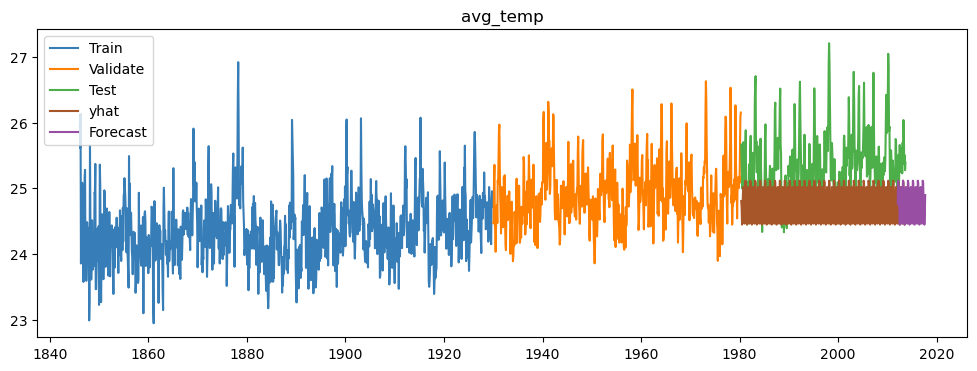

In [109]:
for col in train.columns:
    final_plot(col)